# imports

In [20]:
import asyncio
from pyppeteer import launch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# download image

In [138]:
download=False
if(download):
    browser = await launch()
    page = await browser.newPage()
    await page.setViewport({ "width": 1366, "height": 768});
    await page.goto('https://www.amazon.in/ILIFE-V5x-Automatic-Self-Charging-Detection/dp/B08YWLVPHS')
    await page.screenshot({'path': 'img.png'})
    await browser.close()

# function definitions

In [143]:
def showArrAsImg(numPyArr):
    plt.imshow(numPyArr, cmap='gray')
    
def save(arr,label):
    fName=label+".png";
    Image.fromarray(arr).save(fName);
    
def showImgFromPath(path):
    img = cv2.imread(path, 0)
    plt.imshow(img, cmap='gray')

def imageToNumpyArr(path):
    img = cv2.imread(path, 0)
    return np.asarray(img)


# transform image

### load image

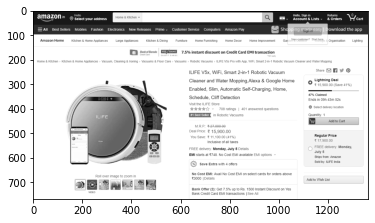

In [142]:
imgAsMatrix = imageToNumpyArr('img.png');
showArrAsImg(imgAsMatrix)

### apply the canny filter - enhance edges

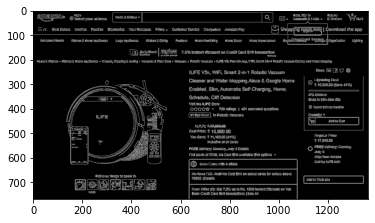

In [141]:
edgeFilteredImg = cv2.Canny(imgAsMatrix, 100, 200)
showArrAsImg(edgeFilteredImg)

### apply image dilation filter - bleed close elements into each other

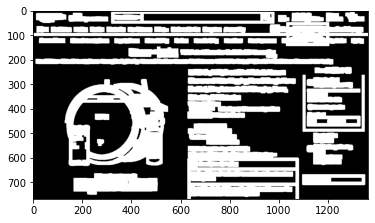

In [156]:
kernel = np.ones((5,5), np.uint8)
dialatedImg = cv2.dilate(edgeFilteredImg, kernel, iterations=3)
showArrAsImg(dialatedImg)

In [158]:
contours, hierarchy = cv2.findContours(dialatedImg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

filteredContours=[]
for c in contours:
    #print(cv2.contourArea(c))
    if(cv2.contourArea(c)>400):
        filteredContours.append(c)

print("total contours "+str(len(contours))+" found.")
print("total filtered contours "+str(len(filteredContours))+" found.")

_dialatedImg = cv2.cvtColor(imgAsMatrix, cv2.COLOR_GRAY2BGR)

save(_dialatedImg,"before")

LINE_THICKNESS=1
segmentedImg=cv2.drawContours(_dialatedImg, filteredContours, -1, (0, 255, 0), LINE_THICKNESS)

save(segmentedImg,"after")


total contours 111 found.
total filtered contours 59 found.
